# AIM 5001 - Python Project 2
Jesus Olivera, Pujita Ravichandar

## Introduction

This dataset counts the empoyees for each general industry within yeach Core-Based Statistical Area and places them into buckets based on, race, gender, etc. for the years of 2013 to 2018. This EDA will be useful for people interested in such topics like, goverment agencies recruiters, diversity and inclusoin specialists, among many others.

### Research Questions

1. How does the participation of a particular industry change with time with respect to gender from 2012 to 2018?
2. How does the participation of executives and technicians change with time with respect to race from 2012 to 2018?
3. What was the industry average representation by race of executives and technicians from 2012 to 2018?
4. What was the average industry representation by gender of executives and technicians from 2012 to 2018?

## Dataset Preparation

### Importing the Dataset

In [2]:
#import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing data from source
filename = 'https://raw.githubusercontent.com/jaynuel/AIM-5001/7e19171a39216da9e2fab117cf8ddf30cd418cb4/CountByLocationAndGeneralIndustry(CBSA-NAC2).csv'
#filename = 'https://raw.githubusercontent.com/jaynuel/AIM-5001/94193a046907705687ce7d22991bf7292ca56426/CountByGeneralIndustry(NAC2).csv'
data = pd.read_csv(filename)
df = pd.DataFrame(data)

#Confirming data loaded properly
df.head()

,cbsaLabel,nac2Label,NAC2,year,totBus/IndLoc,totExec/IndLoc,totProf/IndLoc,totTech/IndLoc,totSales/IndLoc,totAdmin/IndLoc,...,biracialFemaleProfessional,biracialFemaleTechnician,biracialFemaleSalesWorker,biracialFemaleAdminSupport,biracialFemaleCraftWorkers,biracialFemaleOperative,biracialFemaleLaborer,biracialFemaleServiceWorker,biracialFemaleEmployed,biracialFemaleMidOfficer
0,"Abilene, TX",Accommodation and Food Services,72,2012,15,5,0,0,13,14,...,0,0,0,0,0,0,1,13,14,0
1,"Abilene, TX",Administrative and Support and Waste Managemen...,56,2012,4,1,10,4,0,274,...,0,0,0,2,0,0,0,3,5,0
2,"Abilene, TX",Construction,23,2012,4,17,89,14,0,55,...,0,0,0,0,0,0,0,0,0,0
3,"Abilene, TX",Finance and Insurance,52,2012,4,70,97,1,8,1241,...,1,0,0,21,0,0,0,0,22,0
4,"Abilene, TX",Health Care and Social Assistance,62,2012,24,27,1728,859,18,826,...,10,8,1,2,2,1,7,9,41,1


## Data Summary

This dataset was fround from Kaggle and the original data that makes up this dataset was downloaded and reconfigured from EEOC/Data.gov repositories. They collect all of this data and publish it yearly. This data can provide insight into diversity and demographics within industries and can help identify areas of improvement. In total, the dataset contains 25,618 and has 269 columns consisting of 267 'int64' type objects and 2 'object' type objects. The relevant attributes used for our EDA are detailed in the coming sections below.

Dataset link: https://www.kaggle.com/nicholasmarangi/job-patterns-for-minorities-and-women-usa?select=CountByLocationAndGeneralIndustry%28CBSA-NAC2%29.csv

In [3]:
#describe basic features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25618 entries, 0 to 25617
Columns: 269 entries, cbsaLabel to biracialFemaleMidOfficer
dtypes: int64(267), object(2)
memory usage: 52.6+ MB


In [4]:
#finding the data types of all the columns
df.dtypes

cbsaLabel                      object
nac2Label                      object
NAC2                            int64
year                            int64
totBus/IndLoc                   int64
                                ...  
biracialFemaleOperative         int64
biracialFemaleLaborer           int64
biracialFemaleServiceWorker     int64
biracialFemaleEmployed          int64
biracialFemaleMidOfficer        int64
Length: 269, dtype: object

In [200]:
#list column titles for general reference
list(data.columns)

['cbsaLabel',
 'nac2Label',
 'NAC2',
 'year',
 'totBus/IndLoc',
 'totExec/IndLoc',
 'totProf/IndLoc',
 'totTech/IndLoc',
 'totSales/IndLoc',
 'totAdmin/IndLoc',
 'totCraft/IndLoc',
 'totOp/IndLoc',
 'totLabor/IndLoc',
 'totService/IndLoc',
 'totEmp/IndLoc',
 'totMidMan/IndLoc',
 'MaleExecutiveTotal',
 'MaleProfessionalTotal',
 'MaleTechnicianTotal',
 'MaleSalesWorkerTotal',
 'MaleAdminSupportTotal',
 'MaleCraftWorkersTotal',
 'MaleOperativeTotal',
 'MaleLaborerTotal',
 'MaleServiceWorkerTotal',
 'MaleEmployedTotal',
 'MaleMidOfficerTotal',
 'FemaleExecutiveTotal',
 'FemaleProfessionalTotal',
 'FemaleTechnicianTotal',
 'FemaleSalesWorkerTotal',
 'FemaleAdminSupportTotal',
 'FemaleCraftWorkersTotal',
 'FemaleOperativeTotal',
 'FemaleLaborerTotal',
 'FemaleServiceWorkerTotal',
 'FemaleEmployedTotal',
 'FemaleMidOfficerTotal',
 'whiteExecutiveTotal',
 'whiteProfessionalTotal',
 'whiteTechnicianTotal',
 'whiteSalesWorkerTotal',
 'whiteAdminSupportTotal',
 'whiteCraftWorkersTotal',
 'whiteOp

### Preliminary Data Transformation

The original dataset has 269 column entries. This is too many metrics to keep track of. To organize the data, subframes were created to grouping like variables together.

In [6]:
#create dataframes to group like variable together
#create dataframes according to the total, gender, and racial groups

industry_total= df[["cbsaLabel","nac2Label","year","totBus/IndLoc","totExec/IndLoc","totProf/IndLoc","totTech/IndLoc","totSales/IndLoc","totAdmin/IndLoc","totCraft/IndLoc","totOp/IndLoc","totLabor/IndLoc","totService/IndLoc","totEmp/IndLoc","totMidMan/IndLoc"]]

male_total= df[["cbsaLabel","nac2Label","year","MaleExecutiveTotal","MaleProfessionalTotal","MaleTechnicianTotal","MaleSalesWorkerTotal","MaleAdminSupportTotal","MaleCraftWorkersTotal","MaleOperativeTotal","MaleLaborerTotal","MaleServiceWorkerTotal","MaleEmployedTotal","MaleMidOfficerTotal"]]

female_total= df[["cbsaLabel","nac2Label","year","FemaleExecutiveTotal","FemaleProfessionalTotal","FemaleTechnicianTotal","FemaleSalesWorkerTotal","FemaleAdminSupportTotal","FemaleCraftWorkersTotal","FemaleOperativeTotal","FemaleLaborerTotal","FemaleServiceWorkerTotal","FemaleEmployedTotal","FemaleMidOfficerTotal"]]

white_total= df[["cbsaLabel","nac2Label","year","whiteExecutiveTotal","whiteProfessionalTotal","whiteTechnicianTotal","whiteSalesWorkerTotal","whiteAdminSupportTotal","whiteCraftWorkersTotal","whiteOperativeTotal","whiteLaborerTotal","whiteServiceWorkerTotal","whiteEmployedTotal","whiteMidOfficerTotal"]]

white_male= df[["cbsaLabel","nac2Label","year","whiteMaleExecutive","whiteMaleProfessional","whiteMaleTechnician","whiteMaleSalesWorker","whiteMaleAdminSupport","whiteMaleCraftWorkers","whiteMaleOperative","whiteMaleLaborer","whiteMaleServiceWorker","whiteMaleEmployed","whiteMaleMidOfficer"]]

white_female= df[["cbsaLabel","nac2Label","year","whiteFemaleExecutive","whiteFemaleProfessional","whiteFemaleTechnician","whiteFemaleSalesWorker","whiteFemaleAdminSupport","whiteFemaleCraftWorkers","whiteFemaleOperative","whiteFemaleLaborer","whiteFemaleServiceWorker","whiteFemaleEmployed","whiteFemaleMidOfficer"]]

black_total= df[["cbsaLabel","nac2Label","year","blackExecutiveTotal","blackProfessionalTotal","blackTechnicianTotal","blackSalesWorkerTotal","blackAdminSupportTotal","blackCraftWorkersTotal","blackOperativeTotal","blackLaborerTotal","blackServiceWorkerTotal","blackEmployedTotal","blackMidOfficerTotal"]]

black_male= df[["cbsaLabel","nac2Label","year","blackMaleExecutive","blackMaleProfessional","blackMaleTechnician","blackMaleSalesWorker","blackMaleAdminSupport","blackMaleCraftWorkers","blackMaleOperative","blackMaleLaborer","blackMaleServiceWorker","blackMaleEmployed","blackMaleMidOfficer"]]

black_female= df[["cbsaLabel","nac2Label","year","blackFemaleExecutive","blackFemaleProfessional","blackFemaleTechnician","blackFemaleSalesWorker","blackFemaleAdminSupport","blackFemaleCraftWorkers","blackFemaleOperative","blackFemaleLaborer","blackFemaleServiceWorker","blackFemaleEmployed","blackFemaleMidOfficer"]]

hispanic_total= df[["cbsaLabel","nac2Label","year","hispanicOrLatinoExecutiveTotal","hispanicOrLatinoProfessionalTotal","hispanicOrLatinoTechnicianTotal","hispanicOrLatinoSalesWorkerTotal","hispanicOrLatinoAdminSupportTotal","hispanicOrLatinoCraftWorkersTotal","hispanicOrLatinoOperativeTotal","hispanicOrLatinoLaborerTotal","hispanicOrLatinoServiceWorkerTotal","hispanicOrLatinoEmployedTotal","hispanicOrLatinoMidOfficerTotal"]]

hispanic_male= df[["cbsaLabel","nac2Label","year","hispanicOrLatinoMaleExecutive","hispanicOrLatinoMaleProfessional","hispanicOrLatinoMaleTechnician","hispanicOrLatinoMaleSalesWorker","hispanicOrLatinoMaleAdminSupport","hispanicOrLatinoMaleCraftWorkers","hispanicOrLatinoMaleOperative","hispanicOrLatinoMaleLaborer","hispanicOrLatinoMaleServiceWorker","hispanicOrLatinoMaleEmployed","hispanicOrLatinoMaleMidOfficer"]]

hispanic_female= df[["cbsaLabel","nac2Label","year","hispanicOrLatinoFemaleExecutive","hispanicOrLatinoFemaleProfessional","hispanicOrLatinoFemaleTechnician","hispanicOrLatinoFemaleSalesWorker","hispanicOrLatinoFemaleAdminSupport","hispanicOrLatinoFemaleCraftWorkers","hispanicOrLatinoFemaleOperative","hispanicOrLatinoFemaleLaborer","hispanicOrLatinoFemaleServiceWorker","hispanicOrLatinoFemaleEmployed","hispanicOrLatinoFemaleMidOfficer"]]

asian_total= df[["cbsaLabel","nac2Label","year","asianExecutiveTotal","asianProfessionalTotal","asianTechnicianTotal","asianSalesWorkerTotal","asianAdminSupportTotal","asianCraftWorkersTotal","asianOperativeTotal","asianLaborerTotal","asianServiceWorkerTotal","asianEmployedTotal","asianMidOfficerTotal"]]

asian_male= df[["cbsaLabel","nac2Label","year","asianMaleExecutive","asianMaleProfessional","asianMaleTechnician","asianMaleSalesWorker","asianMaleAdminSupport","asianMaleCraftWorkers","asianMaleOperative","asianMaleLaborer","asianMaleServiceWorker","asianMaleEmployed","asianMaleMidOfficer"]]

asian_female= df[["cbsaLabel","nac2Label","year","asianFemaleExecutive","asianFemaleProfessional","asianFemaleTechnician","asianFemaleSalesWorker","asianFemaleAdminSupport","asianFemaleCraftWorkers","asianFemaleOperative","asianFemaleLaborer","asianFemaleServiceWorker","asianFemaleEmployed","asianFemaleMidOfficer"]]

native_total= df[["cbsaLabel","nac2Label","year","americIndianExecutiveTotal","americIndianProfessionalTotal","americIndianTechnicianTotal","americIndianSalesWorkerTotal","americIndianAdminSupportTotal","americIndianCraftWorkersTotal","americIndianOperativeTotal","americIndianLaborerTotal","americIndianServiceWorkerTotal","americIndianEmployedTotal","americIndianMidOfficerTotal"]]

native_male= df[["cbsaLabel","nac2Label","year","americIndianMaleExecutive","americIndianMaleProfessional","americIndianMaleTechnician","americIndianMaleSalesWorker","americIndianMaleAdminSupport","americIndianMaleCraftWorkers","americIndianMaleOperative","americIndianMaleLaborer","americIndianMaleServiceWorker","americIndianMaleEmployed","americIndianMaleMidOfficer"]]

native_female= df[["cbsaLabel","nac2Label","year","americIndianFemaleExecutive","americIndianFemaleProfessional","americIndianFemaleTechnician","americIndianFemaleSalesWorker","americIndianFemaleAdminSupport","americIndianFemaleCraftWorkers","americIndianFemaleOperative","americIndianFemaleLaborer","americIndianFemaleServiceWorker","americIndianFemaleEmployed","americIndianFemaleMidOfficer"]]

pacific_total= df[["cbsaLabel","nac2Label","year","pacificIslanderExecutiveTotal","pacificIslanderProfessionalTotal","pacificIslanderTechnicianTotal","pacificIslanderSalesWorkerTotal","pacificIslanderAdminSupportTotal","pacificIslanderCraftWorkersTotal","pacificIslanderOperativeTotal","pacificIslanderLaborerTotal","pacificIslanderServiceWorkerTotal","pacificIslanderEmployedTotal","pacificIslanderMidOfficerTotal"]]

pacific_male= df[["cbsaLabel","nac2Label","year","pacificIslanderMaleExecutive","pacificIslanderMaleProfessional","pacificIslanderMaleTechnician","pacificIslanderMaleSalesWorker","pacificIslanderMaleAdminSupport","pacificIslanderMaleCraftWorkers","pacificIslanderMaleOperative","pacificIslanderMaleLaborer","pacificIslanderMaleServiceWorker","pacificIslanderMaleEmployed","pacificIslanderMaleMidOfficer"]]

pacific_female= df[["cbsaLabel","nac2Label","year","pacificIslanderFemaleExecutive","pacificIslanderFemaleProfessional","pacificIslanderFemaleTechnician","pacificIslanderFemaleSalesWorker","pacificIslanderFemaleAdminSupport","pacificIslanderFemaleCraftWorkers","pacificIslanderFemaleOperative","pacificIslanderFemaleLaborer","pacificIslanderFemaleServiceWorker","pacificIslanderFemaleEmployed","pacificIslanderFemaleMidOfficer"]]

biracial_total= df[["cbsaLabel","nac2Label","year","biracialExecutiveTotal","biracialProfessionalTotal","biracialTechnicianTotal","biracialSalesWorkerTotal","biracialAdminSupportTotal","biracialCraftWorkersTotal","biracialOperativeTotal","biracialLaborerTotal","biracialServiceWorkerTotal","biracialEmployedTotal","biracialMidOfficerTotal"]]

biracial_male= df[["cbsaLabel","nac2Label","year","biracialMaleExecutive","biracialMaleProfessional","biracialMaleTechnician","biracialMaleSalesWorker","biracialMaleAdminSupport","biracialMaleCraftWorkers","biracialMaleOperative","biracialMaleLaborer","biracialMaleServiceWorker","biracialMaleEmployed","biracialMaleMidOfficer"]]

biracial_female= df[["cbsaLabel","nac2Label","year","biracialFemaleExecutive","biracialFemaleProfessional","biracialFemaleTechnician","biracialFemaleSalesWorker","biracialFemaleAdminSupport","biracialFemaleCraftWorkers","biracialFemaleOperative","biracialFemaleLaborer","biracialFemaleServiceWorker","biracialFemaleEmployed","biracialFemaleMidOfficer"]]

## Exploratory Data Analysis (EDA)

### 1. How does the participation of a particular industry change with time with respect to gender?
The first step to answering this question, is to make a data subset of the relevant values. This dataset called `exec_gender` consists of the column values `cbsaLabel`, `nac2Label`, `year`, `totExec/IndLoc`, `MaleExecutiveTotal`, and `FemaleExecutiveTotal`. This dataset was then summed and grouped by year in a dataset titled `exec_gender_tot`. Overall, this describes the total number of male executives and female executives per year. Using the '.describe()' function provides the basic statistics of this datasubset. This code and further commentary is below.

In [201]:
#create subset of executive positions by gender
exec_gender = df[["cbsaLabel","nac2Label","year", 'totExec/IndLoc', 'MaleExecutiveTotal', 'FemaleExecutiveTotal']]

#group the sums of the executive gender subset by year
exec_gender_tot = exec_gender.groupby(['year']).sum()

exec_gender_tot

,totExec/IndLoc,MaleExecutiveTotal,FemaleExecutiveTotal
year,,,
2012,1469597,1054994,414603
2013,755542,540112,215430
2014,764008,545068,218940
2015,779625,549295,230330
2016,379431,262203,117228
2017,383592,261770,121822
2018,403210,271282,131928


In [8]:
#show the mean, standard deviation, minimum, and quartiles for the
#total, male, and female executives across all industries per year
exec_gender_tot.describe()

,totExec/IndLoc,MaleExecutiveTotal,FemaleExecutiveTotal
count,7.000000e+00,7.000000e+00,7.000000
mean,7.050007e+05,4.978177e+05,207183.000000
std,3.865638e+05,2.827449e+05,103928.499009
min,3.794310e+05,2.617700e+05,117228.000000
25%,3.934010e+05,2.667425e+05,126875.000000
50%,7.555420e+05,5.401120e+05,215430.000000
75%,7.718165e+05,5.471815e+05,224635.000000
max,1.469597e+06,1.054994e+06,414603.000000


**Matplotlib**

[]

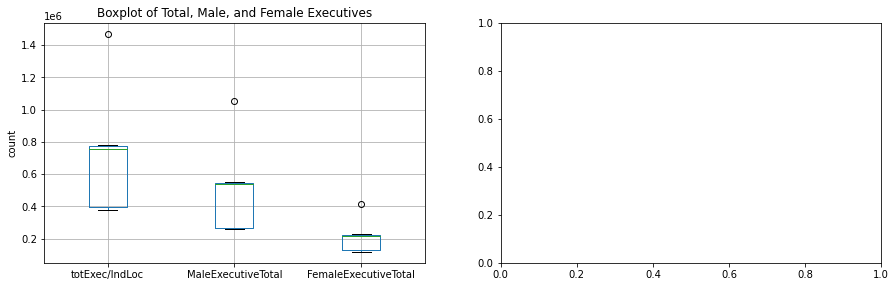

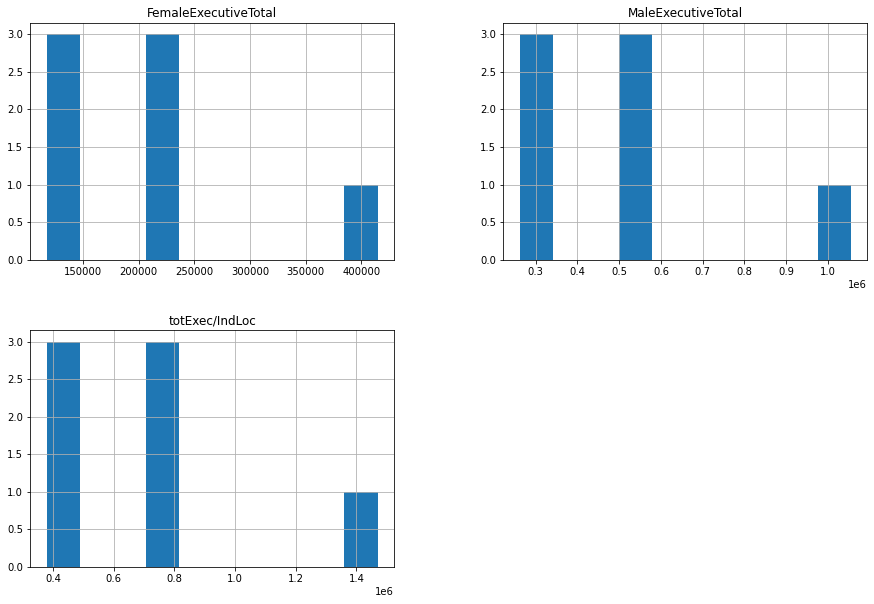

In [202]:
#plot figures with the boxplots of the total, male, and female executives per year in matplotlib
#plot the histograms of the total, male, and female executives per year in matplotlib
plt.figure(1, figsize=(15,15))

plt.subplot(321)
exec_gender_tot.boxplot()
plt.title('Boxplot of Total, Male, and Female Executives')
plt.ylabel('count')

plt.subplot(322)
exec_gender_tot.hist(figsize=(15,10))
plt.xlabel('count')
plt.ylabel('frequency')

plt.plot()

**Seaborn**

[]

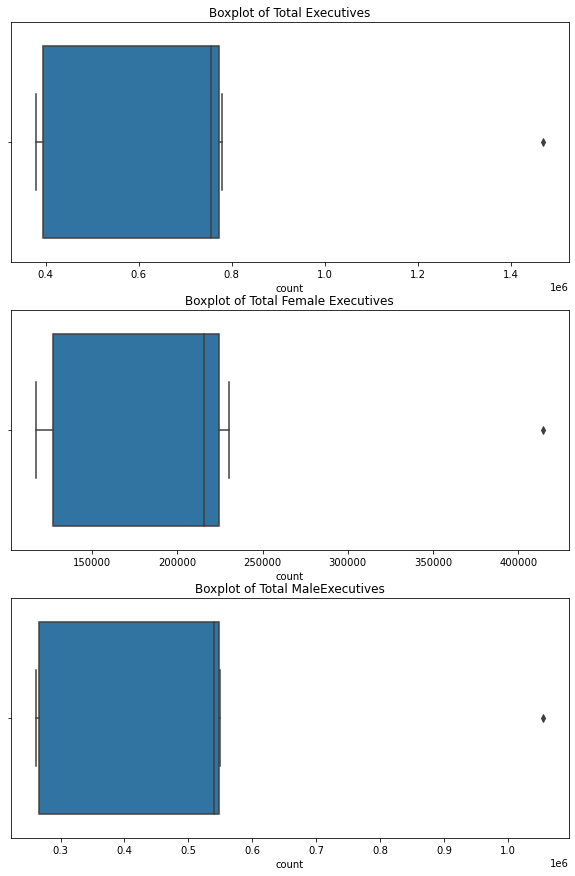

In [203]:
#plot figures with the boxplots of the total, male, and female executives per year in seaborn
#plot the histograms of the total, male, and female executives per year in seaborn
plt.figure(3, figsize=(10,15))

plt.subplot(311)
sns.boxplot(exec_gender_tot['totExec/IndLoc'])
plt.title('Boxplot of Total Executives')
plt.xlabel('count')

plt.subplot(312)
sns.boxplot(exec_gender_tot['FemaleExecutiveTotal'])
plt.title('Boxplot of Total Female Executives')
plt.xlabel('count')

plt.subplot(313)
sns.boxplot(exec_gender_tot['MaleExecutiveTotal'])
plt.title('Boxplot of Total MaleExecutives')
plt.xlabel('count')

plt.plot()

[]

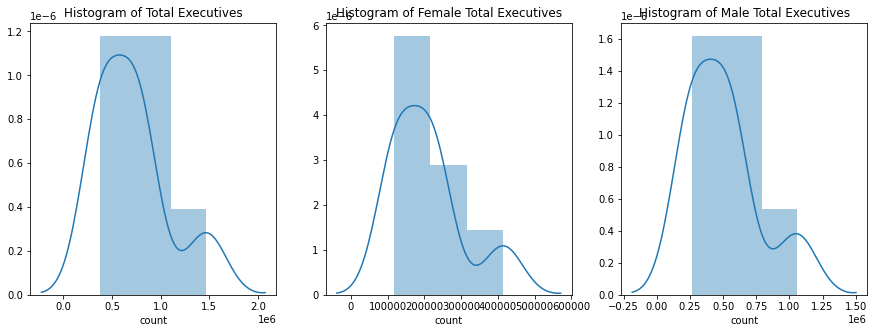

In [153]:
plt.figure(1, figsize=(15,5))

plt.subplot(131)
sns.distplot(exec_gender_tot['totExec/IndLoc'])
plt.title('Histogram of Total Executives')
plt.xlabel('count')

plt.subplot(132)
sns.distplot(exec_gender_tot['FemaleExecutiveTotal'])
plt.title('Histogram of Female Total Executives')
plt.xlabel('count')

plt.subplot(133)
sns.distplot(exec_gender_tot['MaleExecutiveTotal'])
plt.title('Histogram of Male Total Executives')
plt.xlabel('count')

plt.plot()

The histogram and descriptive statistics above show that for all the distributions (total, female, and male executives) per year is skewed to the right with two significant peaks. The mean of the total executives is roughly 0.705 million with a minimum of .379 million and a max of 1.47 million. The mean of the male executives is roughly 0.498 million with a minimum of .262 million and a max of 1.05 million. The mean of the female executives is roughly 207,00  with a minimum of 117,000 and a max of 415,000. There exists some outliers for all of these categories.

### 2. How does the partificpation of a the executive and technician industries change over time with respect to race?

#### Executive
Similar to the question above, the primary step to answering this question is to make a dataset with the relevant values, one dataset for the executive position and one dataset for the technician position. For this inquiry the values `totExec/IndLoc`, `whiteExecutiveTotal`, `blackExecutiveTotal`, `hispanicOrLatinoExecutiveTotal`, `asianExecutiveTotal`, `americIndianExecutiveTotal`, `pacificIslandarExecutiveTotal`, and `biracialExecutiveTotal` were added to a data subset called `exec_race`. Summing and grouping these values by year are in another dataset called `exec_race_tot`. The values  `totTech/IndLoc`, `whiteTechnicianTotal`, `blackTechnicianTotal`, `hispanicOrLatinoTechnicianTotal`, `asianTechnicianTotal`, `americIndianTechnicianTotal`, `pacificIslandarTechnicianTotal`, and `biracialTechnicianTotal` were added to a data subset called `tech_race`. These values were summed and grouped by year in another dataset called `tech_race_tot`. The '.describe()' command provides the basic statistics for these data subsets. The code and further specified commentary is below.

In [64]:
#create data subset with the necessary attributes
exec_race = df[["cbsaLabel","nac2Label","year", 'totExec/IndLoc', 'whiteExecutiveTotal', 'blackExecutiveTotal',
               'hispanicOrLatinoExecutiveTotal', 'asianExecutiveTotal', 'americIndianExecutiveTotal', 
                'pacificIslanderExecutiveTotal', 'biracialExecutiveTotal']]

#sum and group the exec_race dataset by year
exec_race_tot = exec_race.groupby(['year']).sum()

exec_race_tot

,totExec/IndLoc,whiteExecutiveTotal,blackExecutiveTotal,hispanicOrLatinoExecutiveTotal,asianExecutiveTotal,americIndianExecutiveTotal,pacificIslanderExecutiveTotal,biracialExecutiveTotal
year,,,,,,,,
2012,1469597,1284466,45319,57422,67684,3808,2800,8098
2013,755542,657790,22912,29358,37327,1897,1407,4851
2014,764008,660600,24583,30633,39384,2032,1459,5317
2015,779625,666055,25377,37017,41121,2128,1587,6340
2016,379431,307046,14065,18129,35241,3707,715,3707
2017,383592,311547,14255,19189,33470,4094,560,4094
2018,403210,324134,15569,20268,37408,4647,612,4647


In [65]:
#show the mean, standard deviation, minimum, and quartiles for all races of executives across all industries
exec_race_tot.describe()

,totExec/IndLoc,whiteExecutiveTotal,blackExecutiveTotal,hispanicOrLatinoExecutiveTotal,asianExecutiveTotal,americIndianExecutiveTotal,pacificIslanderExecutiveTotal,biracialExecutiveTotal
count,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,7.050007e+05,6.016626e+05,23154.285714,30288.000000,41662.142857,3187.571429,1305.714286,5293.428571
std,3.865638e+05,3.476058e+05,10936.665438,13868.109725,11746.299381,1135.039920,788.673932,1501.692696
min,3.794310e+05,3.070460e+05,14065.000000,18129.000000,33470.000000,1897.000000,560.000000,3707.000000
25%,3.934010e+05,3.178405e+05,14912.000000,19728.500000,36284.000000,2080.000000,663.500000,4370.500000
50%,7.555420e+05,6.577900e+05,22912.000000,29358.000000,37408.000000,3707.000000,1407.000000,4851.000000
75%,7.718165e+05,6.633275e+05,24980.000000,33825.000000,40252.500000,3951.000000,1523.000000,5828.500000
max,1.469597e+06,1.284466e+06,45319.000000,57422.000000,67684.000000,4647.000000,2800.000000,8098.000000


**Matplotlib**

[]

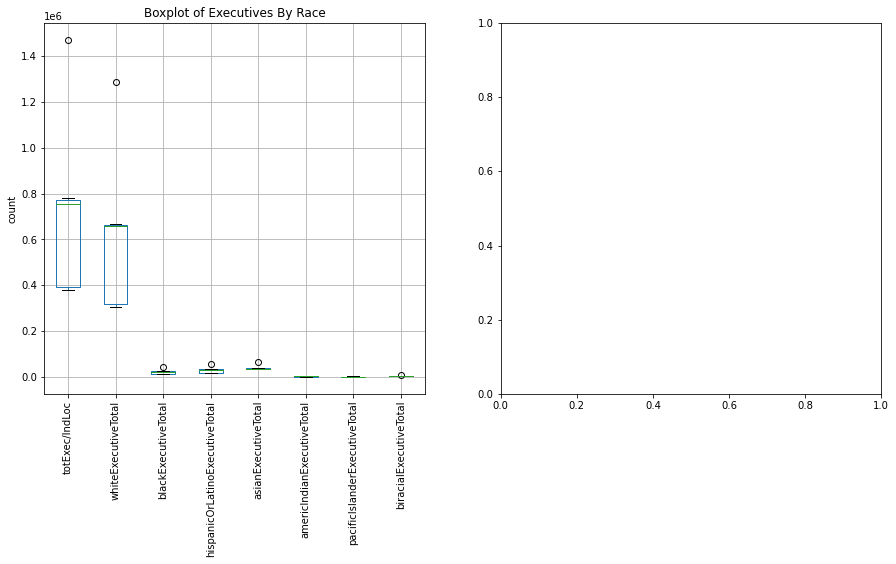

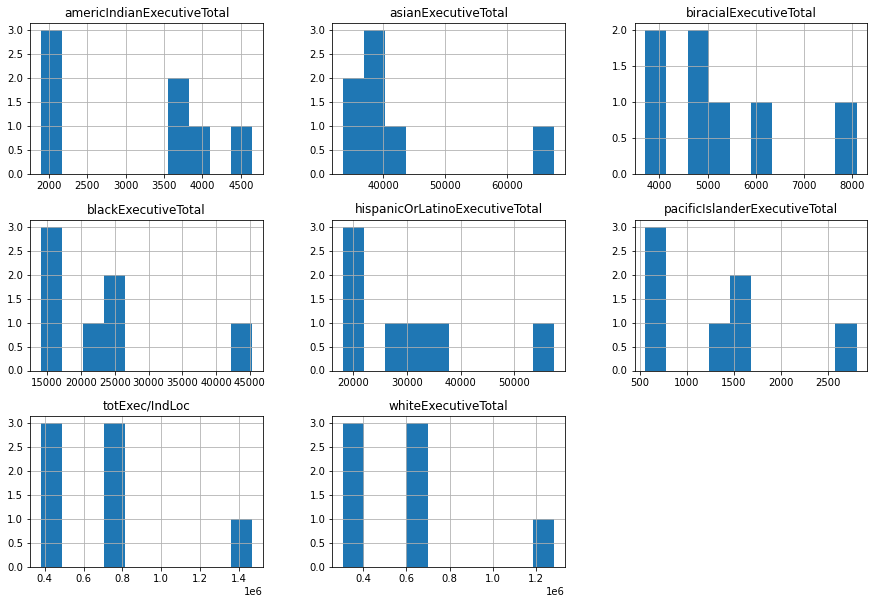

In [208]:
#plot figures with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial executives per year in matplotlib
#plot histograms with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial executives per year in matplotlib

plt.figure(2, figsize=(15,15))

plt.subplot(221)
exec_race_tot.boxplot()
plt.title('Boxplot of Executives By Race')
plt.ylabel('count')
plt.xticks(rotation = 'vertical')

plt.subplot(222)
exec_race_tot.hist(figsize=(15,10))
plt.xlabel('count')
plt.ylabel('frequency')

plt.plot()

**Seaborn**

[]

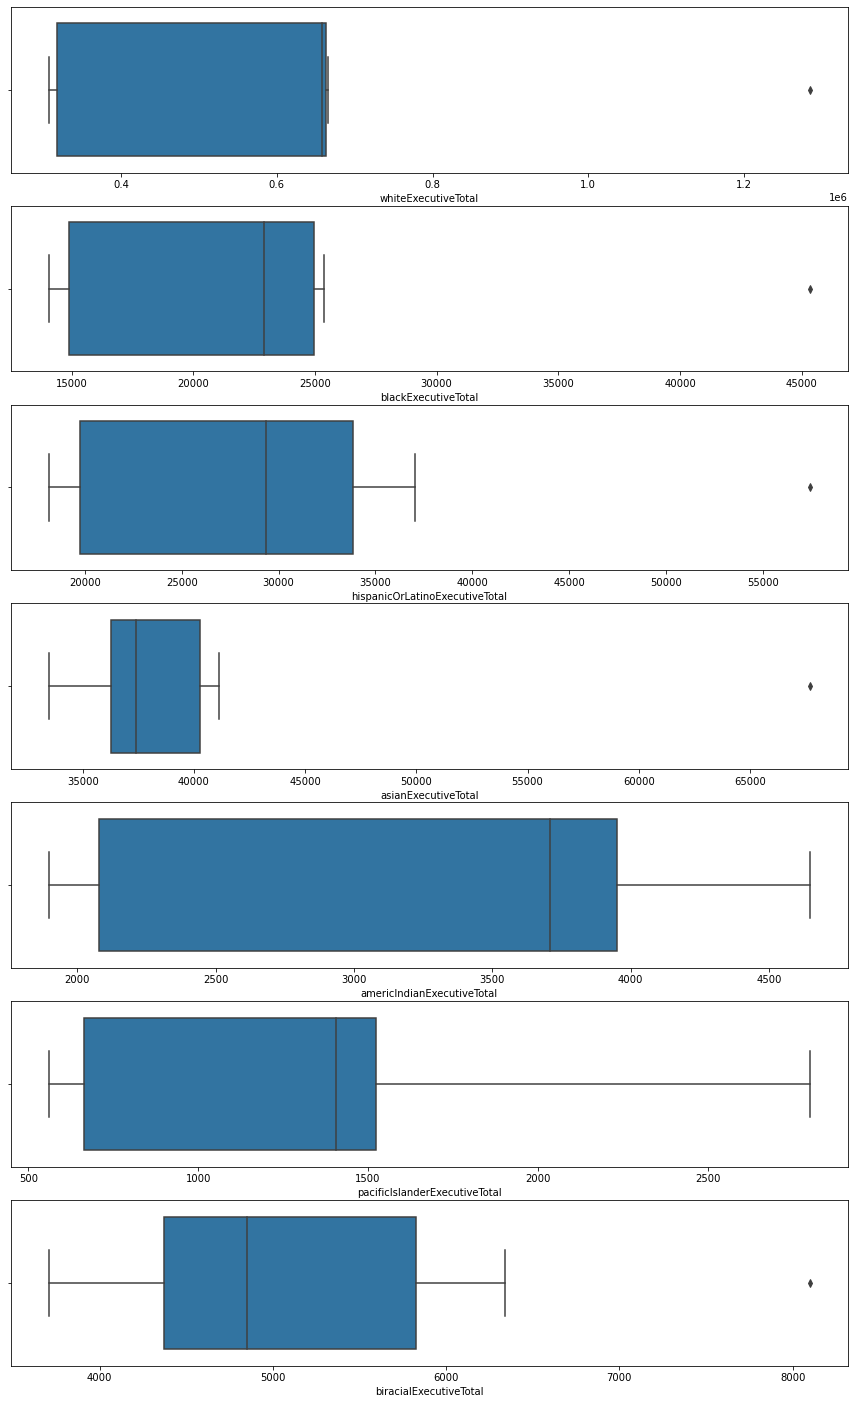

In [210]:
#plot figures with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial executives per year in seaborn

plt.figure(7, figsize=(15,25))

plt.subplot(711)
sns.boxplot(exec_race_tot['whiteExecutiveTotal'])

plt.subplot(712)
sns.boxplot(exec_race_tot['blackExecutiveTotal'])

plt.subplot(713)
sns.boxplot(exec_race_tot['hispanicOrLatinoExecutiveTotal'])

plt.subplot(714)
sns.boxplot(exec_race_tot['asianExecutiveTotal'])

plt.subplot(715)
sns.boxplot(exec_race_tot['americIndianExecutiveTotal'])

plt.subplot(716)
sns.boxplot(exec_race_tot['pacificIslanderExecutiveTotal'])

plt.subplot(717)
sns.boxplot(exec_race_tot['biracialExecutiveTotal'])

plt.plot()

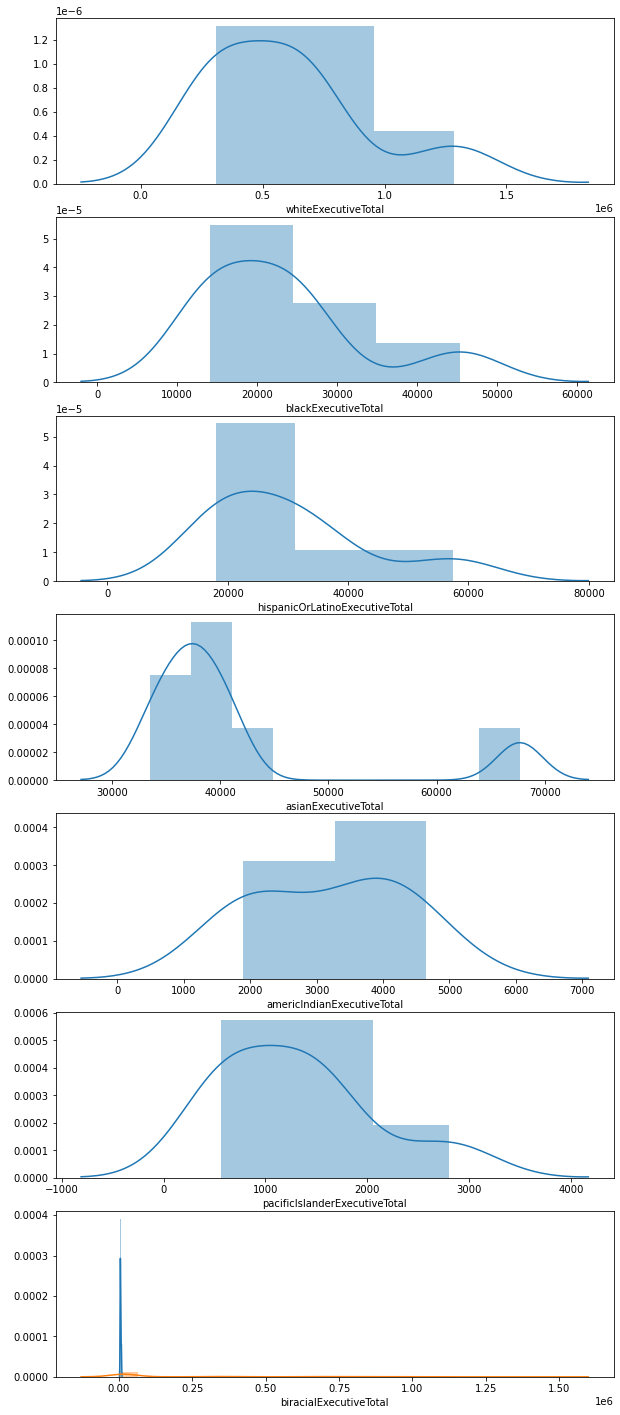

In [211]:
#plot histograms with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial executives per year in seaborn

plt.figure(7, figsize=(10,25))

plt.subplot(711)
sns.distplot(exec_race_tot['whiteExecutiveTotal'])

plt.subplot(712)
sns.distplot(exec_race_tot['blackExecutiveTotal'])

plt.subplot(713)
sns.distplot(exec_race_tot['hispanicOrLatinoExecutiveTotal'])

plt.subplot(714)
sns.distplot(exec_race_tot['asianExecutiveTotal'])

plt.subplot(715)
sns.distplot(exec_race_tot['americIndianExecutiveTotal'])

plt.subplot(716)
sns.distplot(exec_race_tot['pacificIslanderExecutiveTotal'])

plt.subplot(717)
sns.distplot(exec_race_tot['biracialExecutiveTotal'])

sns.distplot(exec_race_tot)

**Executive Analysis**

For the executive industy, every race has a multimodal distribution, which is clearly shown in the histograms. From the boxplots, the white executives have the largest inner quartile range and the largest mean value among the other races with 0.60 million executives. The range of executives among the remaining races are similar and significantly smaller than the white executives; the asian executives lead this range with 42,000 and the pacific islander executives have the minimum value of 1,300 executives. The white, black, hispanic/latino, asian, and biracial executives have some outliers.

#### Technicians

In [213]:
#create data subframe with technician total values for all racse
tech_race = df[["cbsaLabel","nac2Label","year", 'totTech/IndLoc', 'whiteTechnicianTotal', 'blackTechnicianTotal',
               'hispanicOrLatinoTechnicianTotal', 'asianTechnicianTotal', 'americIndianTechnicianTotal', 
                'pacificIslanderTechnicianTotal', 'biracialTechnicianTotal']]

#sum and group tech_race datafram by year
tech_race_tot = tech_race.groupby(['year']).sum()

tech_race_tot

,totTech/IndLoc,whiteTechnicianTotal,blackTechnicianTotal,hispanicOrLatinoTechnicianTotal,asianTechnicianTotal,americIndianTechnicianTotal,pacificIslanderTechnicianTotal,biracialTechnicianTotal
year,,,,,,,,
2012,4912536,3276899,696186,488972,352959,25356,21603,50561
2013,2514323,1658100,358075,260637,181995,12596,11788,31132
2014,2538009,1652355,367691,272592,183909,12986,11428,37048
2015,2546661,1638326,376836,278572,187987,13107,12196,39637
2016,926254,667433,224570,342026,136074,23525,7740,23525
2017,1021747,648664,217888,331294,138270,25426,7625,25426
2018,1043793,675727,238575,356996,144228,28887,7824,28887


In [82]:
#show the mean, standard deviation, minimum, and quartiles for all races of technicians across all industries
tech_race_tot.describe()

,totTech/IndLoc,whiteTechnicianTotal,blackTechnicianTotal,hispanicOrLatinoTechnicianTotal,asianTechnicianTotal,americIndianTechnicianTotal,pacificIslanderTechnicianTotal,biracialTechnicianTotal
count,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2.214760e+06,1.459643e+06,354260.142857,333012.714286,189346.000000,20269.000000,11457.714286,33745.142857
std,1.416396e+06,9.408044e+05,166542.211339,78353.247324,75649.362747,7077.604821,4920.989694,9420.592894
min,9.262540e+05,6.486640e+05,217888.000000,260637.000000,136074.000000,12596.000000,7625.000000,23525.000000
25%,1.032770e+06,6.715800e+05,231572.500000,275582.000000,141249.000000,13046.500000,7782.000000,27156.500000
50%,2.514323e+06,1.638326e+06,358075.000000,331294.000000,181995.000000,23525.000000,11428.000000,31132.000000
75%,2.542335e+06,1.655228e+06,372263.500000,349511.000000,185948.000000,25391.000000,11992.000000,38342.500000
max,4.912536e+06,3.276899e+06,696186.000000,488972.000000,352959.000000,28887.000000,21603.000000,50561.000000


**Matplotlib**

[]

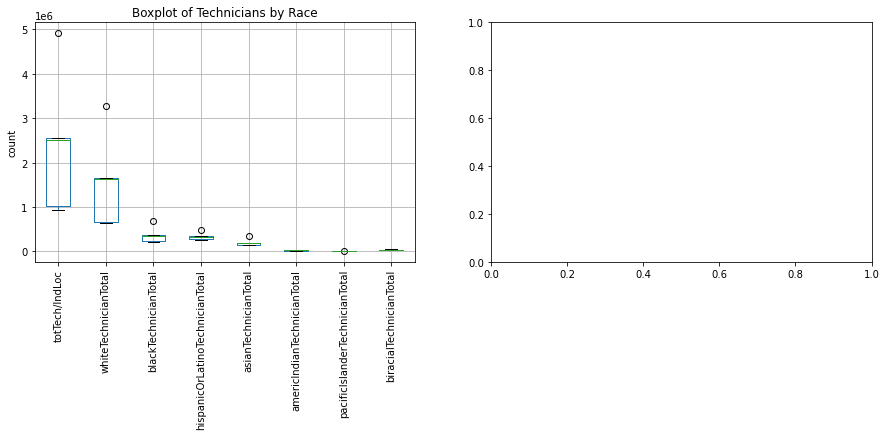

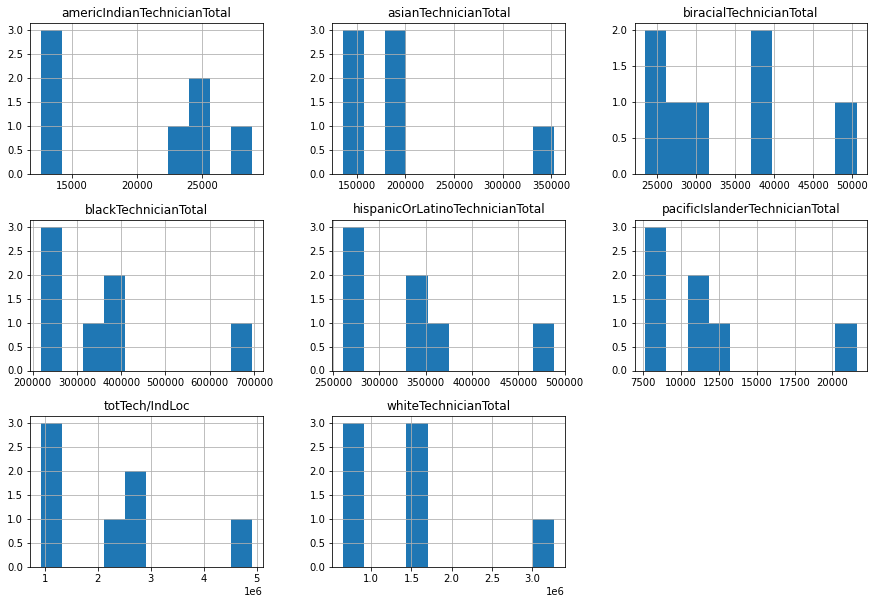

In [214]:
#plot figures with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial technicians per year in matplotlib
#plot histograms with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial technicians per year in matplotlib
plt.figure(3, figsize=(15,15))

plt.subplot(321)
tech_race_tot.boxplot()
plt.title('Boxplot of Technicians by Race')
plt.ylabel('count')
plt.xticks(rotation = 'vertical')

plt.subplot(322)
tech_race_tot.hist(figsize=(15,10))
plt.xlabel('count')
plt.ylabel('frequency')

plt.plot()

**Seaborn boxplots and histograms**

[]

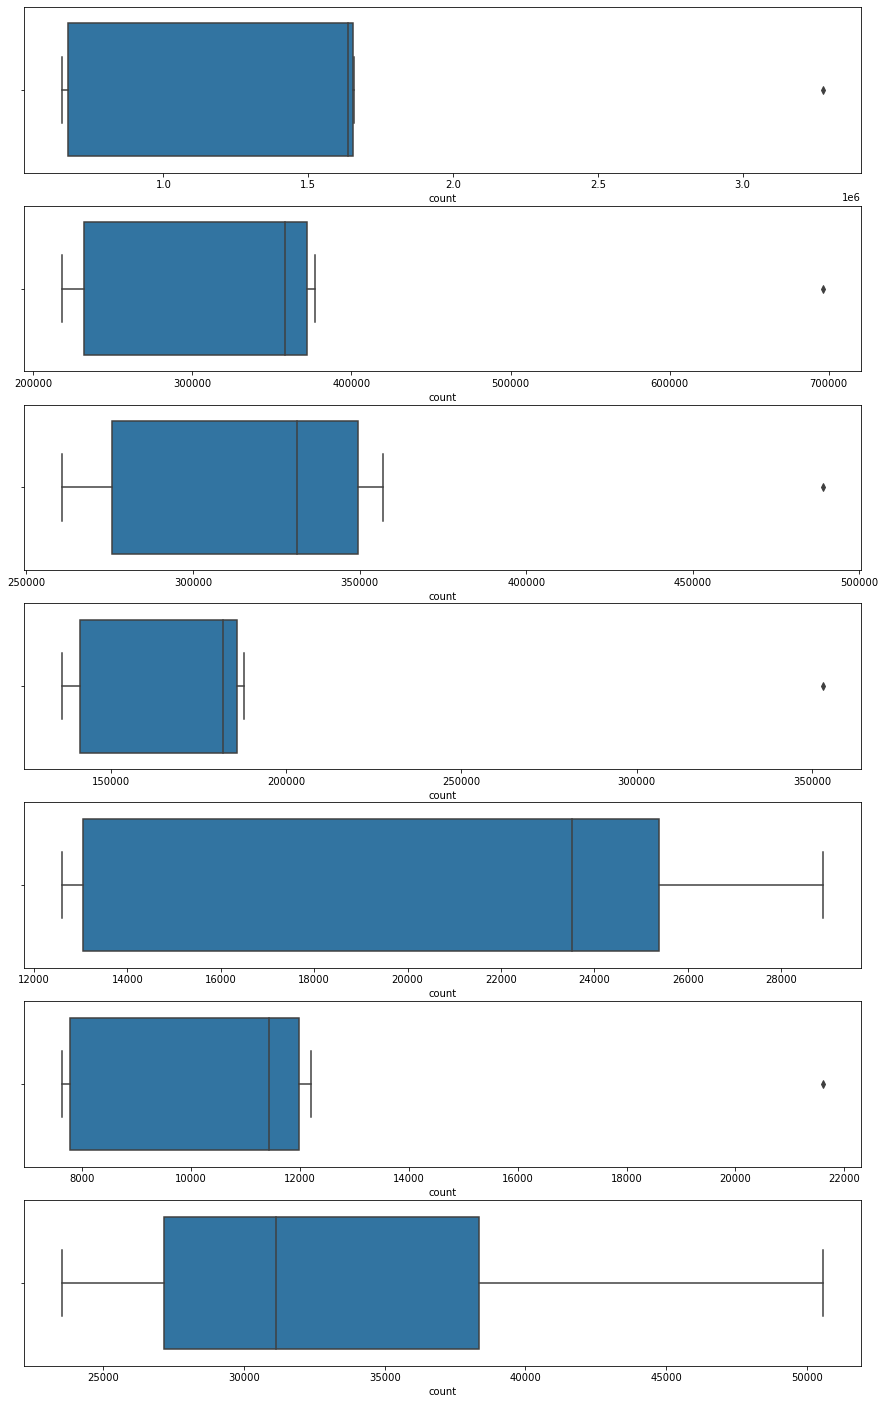

In [215]:
#plot figures with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial technicians per year in seaborn

plt.figure(7, figsize=(15,25))

plt.subplot(711)
sns.boxplot(tech_race_tot['whiteTechnicianTotal'])
plt.xlabel('count')

plt.subplot(712)
sns.boxplot(tech_race_tot['blackTechnicianTotal'])
plt.xlabel('count')

plt.subplot(713)
sns.boxplot(tech_race_tot['hispanicOrLatinoTechnicianTotal'])
plt.xlabel('count')

plt.subplot(714)
sns.boxplot(tech_race_tot['asianTechnicianTotal'])
plt.xlabel('count')

plt.subplot(715)
sns.boxplot(tech_race_tot['americIndianTechnicianTotal'])
plt.xlabel('count')

plt.subplot(716)
sns.boxplot(tech_race_tot['pacificIslanderTechnicianTotal'])
plt.xlabel('count')

plt.subplot(717)
sns.boxplot(tech_race_tot['biracialTechnicianTotal'])
plt.xlabel('count')

plt.plot()

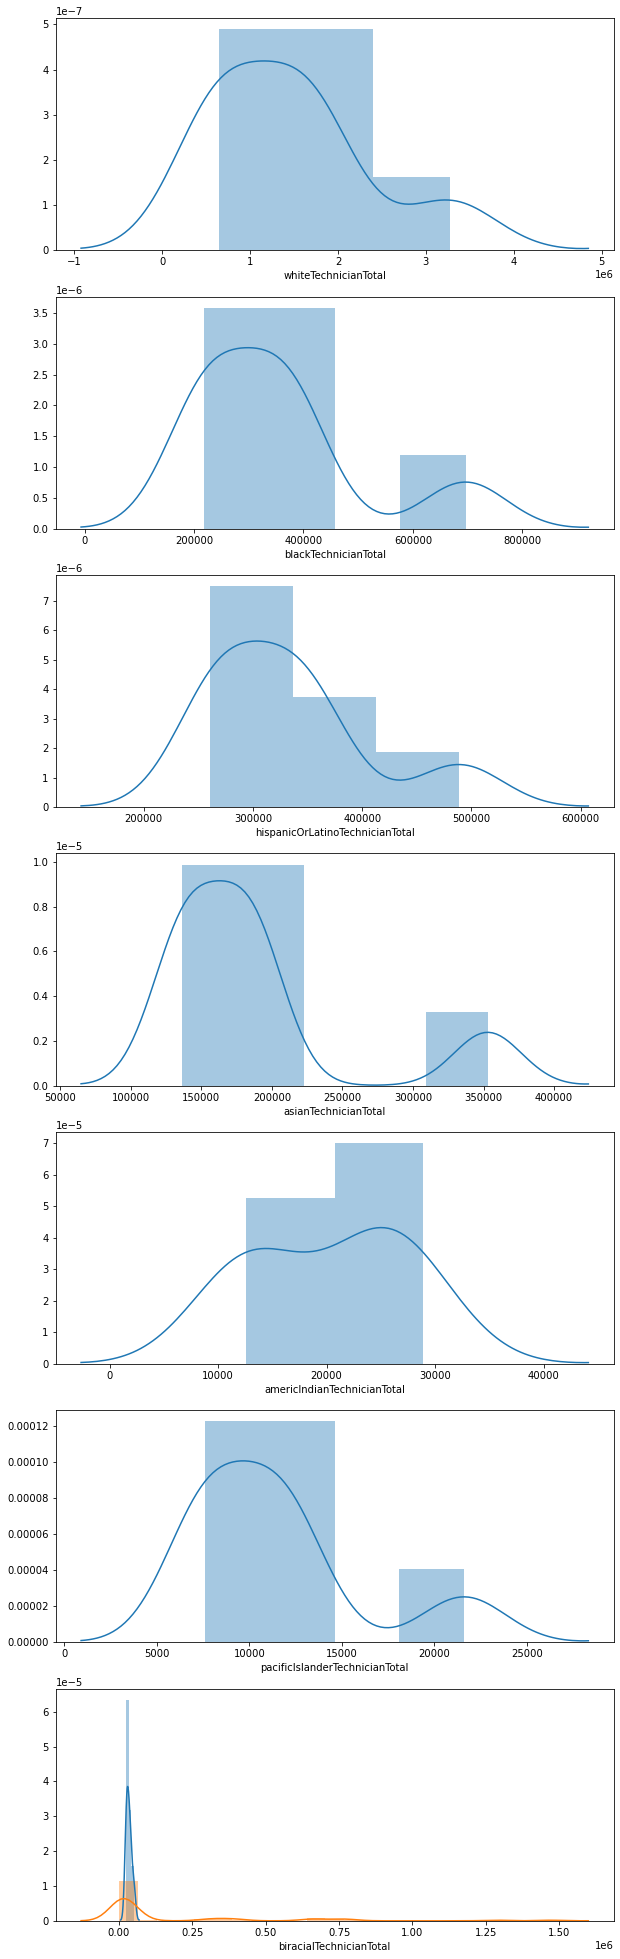

In [216]:
#plot histograms with the boxplots of the total, white, black, hispanic/latino,
#asian, american indian, pacific islander, and biracial technicians per year in seaborn

plt.figure(7, figsize=(10,35))

plt.subplot(711)
sns.distplot(tech_race_tot['whiteTechnicianTotal'])

plt.subplot(712)
sns.distplot(tech_race_tot['blackTechnicianTotal'])

plt.subplot(713)
sns.distplot(tech_race_tot['hispanicOrLatinoTechnicianTotal'])

plt.subplot(714)
sns.distplot(tech_race_tot['asianTechnicianTotal'])

plt.subplot(715)
sns.distplot(tech_race_tot['americIndianTechnicianTotal'])

plt.subplot(716)
sns.distplot(tech_race_tot['pacificIslanderTechnicianTotal'])

plt.subplot(717)
sns.distplot(tech_race_tot['biracialTechnicianTotal'])

sns.distplot(exec_race_tot)

**Technician Analysis**

Similarly to the executive industry, for the technician industy every race has a multimodal distribution, which is  shown by the histograms above. From the boxplots, the white technicians have the largest inner quartile range and the largest mean value among the other races with 1.46 million technicians. The range of technicians among the remaining races are similar and significantly smaller than the white technicians; the black executives lead this range with 354,000 and the pacific islander executives have the minimum value of 1,100 technicians. This range for nonwhite technicians is wider than the previous range for the nonwhite executives. The total, white, black, hispanic/latino, asian, and pacific islander technicians all have some outliers.

### 3. What was the industry average representation by race of executives and technicians from 2012 to 2018?
#### Executives<br>
To answer the question, I first created the dataframes containing the values for the analysis.<br>Dataframe`exec_race`contains columns `year`,`whiteExecutiveTotal`,`blackExecutiveTotal`,<br>`hispanicOrLatinoExecutiveTotal`,`asianExecutiveTotal`,`americIndianExecutiveTotal`,<br>`pacificIslanderExecutiveTotal`, and `biracialExecutiveTotal`. Dataframe groups executive's industry totals by racial group. <br>



In [176]:
# First dataframe contains the executive values per race and the second dataframe contains the 
# total values of the executives in the industry
exec_race = df[["year","whiteExecutiveTotal","blackExecutiveTotal","hispanicOrLatinoExecutiveTotal","asianExecutiveTotal","americIndianExecutiveTotal","pacificIslanderExecutiveTotal","biracialExecutiveTotal"]]
exec_tot = df[["year","totExec/IndLoc"]]

# Grouped by year and sum the values.
exec_by_race = exec_race.groupby('year').sum()
exec_ind_tot = exec_tot.groupby('year').sum()

# Values divided by the industry totals and multiply by 100 to obtain the percentage.
by_race = exec_by_race.values/exec_ind_tot.values*100

# Results Printed Below
by_race


array([[87.40260085,  3.08377058,  3.9073297 ,  4.60561637,  0.25911866,
         0.19052842,  0.55103542],
       [87.06200317,  3.032525  ,  3.88568736,  4.94042687,  0.25107803,
         0.18622393,  0.64205564],
       [86.46506319,  3.21763646,  4.00951299,  5.15491984,  0.2659658 ,
         0.19096659,  0.69593512],
       [85.4327401 ,  3.25502646,  4.74805195,  5.27445887,  0.27295174,
         0.2035594 ,  0.81321148],
       [80.92275012,  3.70686633,  4.77794382,  9.28785471,  0.97698923,
         0.18844006,  0.97698923],
       [81.21832572,  3.71618803,  5.00245052,  8.72541659,  1.06727982,
         0.14598845,  1.06727982],
       [80.38838322,  3.86126336,  5.02666105,  9.27754768,  1.15250118,
         0.15178195,  1.15250118]])

In [177]:
# Creating dataframe from array results 

rows_years = ["2012","2013","2014","2015","2016","2017","2018"]
column_titles = ["White","Black","Hispanic/Latino","Asian","NativeAmerican","PacificIslander","Biracial"]
 
executive_representation= pd.DataFrame(data=by_race, index=rows_years, columns=column_titles)

# Dataframe Printed Below
executive_representation.round(2)

,White,Black,Hispanic/Latino,Asian,NativeAmerican,PacificIslander,Biracial
2012,87.40,3.08,3.91,4.61,0.26,0.19,0.55
2013,87.06,3.03,3.89,4.94,0.25,0.19,0.64
2014,86.47,3.22,4.01,5.15,0.27,0.19,0.70
2015,85.43,3.26,4.75,5.27,0.27,0.20,0.81
2016,80.92,3.71,4.78,9.29,0.98,0.19,0.98
2017,81.22,3.72,5.00,8.73,1.07,0.15,1.07
2018,80.39,3.86,5.03,9.28,1.15,0.15,1.15


In [178]:
# Stats: mean, standard deviation, minimum, and quartiles for the
#total executives across all industries per year by racial group
executive_representation.describe()

,White,Black,Hispanic/Latino,Asian,NativeAmerican,PacificIslander,Biracial
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,84.127409,3.410468,4.479662,6.752320,0.606555,0.179641,0.842715
std,3.141660,0.340453,0.522004,2.210802,0.432418,0.021788,0.228102
min,80.388383,3.032525,3.885687,4.605616,0.251078,0.145988,0.551035
25%,81.070538,3.150704,3.958421,5.047673,0.262542,0.169003,0.668995
50%,85.432740,3.255026,4.748052,5.274459,0.272952,0.188440,0.813211
75%,86.763533,3.711527,4.890197,9.001482,1.022135,0.190748,1.022135
max,87.402601,3.861263,5.026661,9.287855,1.152501,0.203559,1.152501


#### Technicians<br>
To answer the question, I first created the dataframes containing the values for the analysis.<br>Dataframe`tech_race`contains columns`year`,`whiteTechnicianTotal`,`blackTechnicianTotal`,<br>`hispanicOrLatinoTechnicianTotal`,`asianTechnicianTotal`,`americIndianTechnicianTotal`,<br>`pacificIslanderTechnicianTotal`, and `biracialTechnicianTotal`. Dataframe groups technician's industry totals by racial group. <br>


In [183]:
# First dataframe contains the technician values per race and the second dataframe contains the 
# the technician totals of the industry.
tech_race = df[["year","whiteTechnicianTotal","blackTechnicianTotal","hispanicOrLatinoTechnicianTotal","asianTechnicianTotal","americIndianTechnicianTotal","pacificIslanderTechnicianTotal","biracialTechnicianTotal"]]
tech_tot = df[["year","totTech/IndLoc"]]

# Summed the results and grouped by year
tech_by_race = tech_race.groupby('year').sum() 
tech_ind_tot = tech_tot.groupby('year').sum()

# Divided the values per race by the industry values and multiplied by 100 to obtain 
# representation by race
by_races = tech_by_race.values/tech_ind_tot.values*100

# Results Printed Below
by_races

array([[66.70483433, 14.17162134,  9.95355556,  7.18486338,  0.51614889,
         0.4397525 ,  1.02922401],
       [65.94618114, 14.24140812, 10.36609059,  7.23833016,  0.50096984,
         0.46883396,  1.23818618],
       [65.10437906, 14.48737967, 10.74038745,  7.2461918 ,  0.51166091,
         0.45027421,  1.4597269 ],
       [64.33231592, 14.79725806, 10.93871544,  7.38170491,  0.51467392,
         0.47890159,  1.55643016],
       [72.05723268, 24.24496952, 36.92572448, 14.69078676,  2.5398001 ,
         0.83562392,  2.5398001 ],
       [63.48577485, 21.32504426, 32.42426941, 13.53270428,  2.48848296,
         0.74627085,  2.48848296],
       [64.73764434, 22.8565434 , 34.20180055, 13.81768224,  2.76750275,
         0.74957391,  2.76750275]])

In [184]:
# Creating dataframe from array results
rows_years = ["2012","2013","2014","2015","2016","2017","2018"]
column_titles = ["White","Black","Hispanic/Latino","Asian","NativeAmerican","PacificIslander","Biracial"]

Technician_representation= pd.DataFrame(data=by_races, index=rows_years, columns=column_titles)

# Dataframe is Printed Below
Technician_representation.round(2)

,White,Black,Hispanic/Latino,Asian,NativeAmerican,PacificIslander,Biracial
2012,66.70,14.17,9.95,7.18,0.52,0.44,1.03
2013,65.95,14.24,10.37,7.24,0.50,0.47,1.24
2014,65.10,14.49,10.74,7.25,0.51,0.45,1.46
2015,64.33,14.80,10.94,7.38,0.51,0.48,1.56
2016,72.06,24.24,36.93,14.69,2.54,0.84,2.54
2017,63.49,21.33,32.42,13.53,2.49,0.75,2.49
2018,64.74,22.86,34.20,13.82,2.77,0.75,2.77


In [185]:
# Stats: mean, standard deviation, minimum, and quartiles for the
#total executives across all industries per year by racial group
Technician_representation.describe()

,White,Black,Hispanic/Latino,Asian,NativeAmerican,PacificIslander,Biracial
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,66.052623,18.017746,20.792935,10.156038,1.405606,0.595604,1.868479
std,2.848056,4.564700,12.908157,3.625798,1.119239,0.172780,0.708213
min,63.485775,14.171621,9.953556,7.184863,0.500970,0.439753,1.029224
25%,64.534980,14.364394,10.553239,7.242261,0.513167,0.459554,1.348957
50%,65.104379,14.797258,10.938715,7.381705,0.516149,0.478902,1.556430
75%,66.325508,22.090794,33.313035,13.675193,2.514142,0.747922,2.514142
max,72.057233,24.244970,36.925724,14.690787,2.767503,0.835624,2.767503


### 4. What was the average industry representation by gender of executives and technicians from 2012 to 2018?
<br>

 #### Executives 
 
 To answer the question, I first created the dataframes containing the values for the analysis.<br>Dataframe`gender_exec`contains columns `year`,`MaleExecutiveTotal`, and `FemaleExecutiveTotal`.<br>

In [188]:
gender_exec = df[["year","MaleExecutiveTotal","FemaleExecutiveTotal"]]
    
# I added the values of the total male executives with the total female executives using the 
# ".sum()" function to get the total value of the industry. 
exec_ind_tot_col = gender_exec['MaleExecutiveTotal']+ gender_exec['FemaleExecutiveTotal']
gender_exec['ExecTotal']= exec_ind_tot_col

# Groped by "year" and divided both, the female and male results, by the total industry value. 
gender_exec_year = gender_exec.groupby('year').sum()
fexec_percent = gender_exec_year['FemaleExecutiveTotal']*100/ gender_exec_year['ExecTotal']
gender_exec_year['FemalePercent']= fexec_percent
mexec_percent = gender_exec_year['MaleExecutiveTotal']*100/gender_exec_year['ExecTotal']
gender_exec_year['MalePercent']=mexec_percent

# Created dataframe containing values
gender_representation = pd.DataFrame(data=gender_exec_year)

# DataFrame Printed Below
gender_representation.round(2)

<ipython-input-188-cd8a0bcabe74>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_exec['ExecTotal']= exec_ind_tot_col


,MaleExecutiveTotal,FemaleExecutiveTotal,ExecTotal,FemalePercent,MalePercent
year,,,,,
2012,1054994,414603,1469597,28.21,71.79
2013,540112,215430,755542,28.51,71.49
2014,545068,218940,764008,28.66,71.34
2015,549295,230330,779625,29.54,70.46
2016,262203,117228,379431,30.90,69.10
2017,261770,121822,383592,31.76,68.24
2018,271282,131928,403210,32.72,67.28


In [189]:
# Stats: mean, standard deviation, minimum, and quartiles for the
#total executives across all industries per year by racial group
gender_representation.describe()

,MaleExecutiveTotal,FemaleExecutiveTotal,ExecTotal,FemalePercent,MalePercent
count,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000
mean,4.978177e+05,207183.000000,7.050007e+05,30.042738,69.957262
std,2.827449e+05,103928.499009,3.865638e+05,1.765210,1.765210
min,2.617700e+05,117228.000000,3.794310e+05,28.212020,67.280573
25%,2.667425e+05,126875.000000,3.934010e+05,28.585037,68.673021
50%,5.401120e+05,215430.000000,7.555420e+05,29.543691,70.456309
75%,5.471815e+05,224635.000000,7.718165e+05,31.326979,71.414963
max,1.054994e+06,414603.000000,1.469597e+06,32.719427,71.787980


## Inference

### 1. How does the participation of a particular industry change with time with respect to gender?

**Matplotlib**

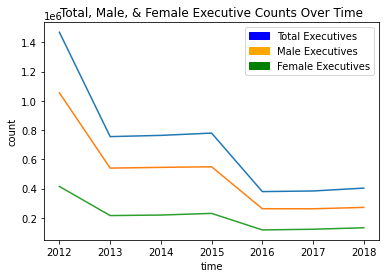

In [230]:
#import packages to aid with legend creation
import matplotlib.patches as mpatches

#create variables to represent the total, male, and female executive total columns
y = exec_gender_tot.loc[:,'MaleExecutiveTotal']
y1 = exec_gender_tot.loc[:,'FemaleExecutiveTotal']
y2 = exec_gender_tot.loc[:,'totExec/IndLoc']

#create a line plot total, male, and female executives in matplotlib
ax = plt.figure()

plt.plot(y2)
plt.plot(y)
plt.plot(y1)
plt.title('Total, Male, & Female Executive Counts Over Time')
plt.xlabel('time')
plt.ylabel('count')
blue_patch = mpatches.Patch(color='blue', label='Total Executives')
orange_patch = mpatches.Patch(color='orange', label='Male Executives')
green_patch = mpatches.Patch(color='green', label='Female Executives')
plt.legend(handles=[blue_patch, orange_patch, green_patch])

plt.show()

**Seaborn plot**

Text(0, 0.5, 'count')

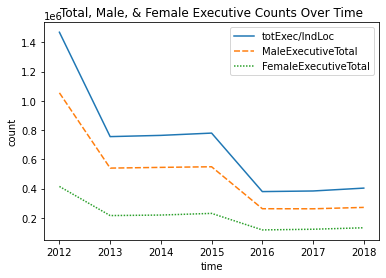

In [157]:
#create a line plot total, male, and female executives in seaborn
sns.lineplot(data = exec_gender_tot)
plt.title('Total, Male, & Female Executive Counts Over Time')
plt.xlabel('time')
plt.ylabel('count')

This graph shows is that there are more male executives than female executives for the timeframe of this dataset (2012 to 2018). It is interesting to see that the total number of executives has decreased over time and the male and female executives have decreased with it. The number of female executives has never been equal to or high than the number of male executives.

### 2. How does the participation of a particular industry change with time with respect to race?

**Matplotlib plot**

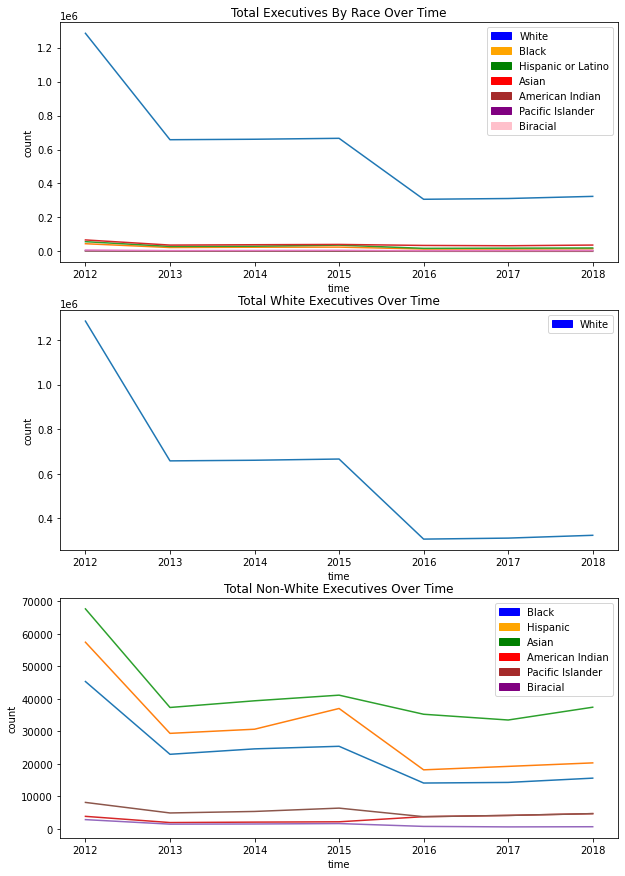

In [238]:
#create variable to represent the white, black, hispanic/latino, asian, american indian,
#pacific islander, and biracial executive total columns
egt = exec_race_tot.loc[:,'whiteExecutiveTotal']
egt1 = exec_race_tot.loc[:,'blackExecutiveTotal']
egt2 = exec_race_tot.loc[:,'hispanicOrLatinoExecutiveTotal']
egt3 = exec_race_tot.loc[:,'asianExecutiveTotal']
egt4 = exec_race_tot.loc[:,'americIndianExecutiveTotal']
egt5 = exec_race_tot.loc[:,'pacificIslanderExecutiveTotal']
egt6 = exec_race_tot.loc[:,'biracialExecutiveTotal']

#create a line graph for the columns above
plt.figure(3, figsize=(10,15))

#plot all the columns
plt.subplot(311)
plt.plot(egt)
plt.plot(egt1)
plt.plot(egt2)
plt.plot(egt3)
plt.plot(egt4)
plt.plot(egt5)
plt.plot(egt6)
plt.title('Total Executives By Race Over Time')
plt.xlabel('time')
plt.ylabel('count')
#create legend
blue = mpatches.Patch(color='blue', label='White')
orange = mpatches.Patch(color='orange', label='Black')
green = mpatches.Patch(color='green', label='Hispanic or Latino')
red = mpatches.Patch(color='red', label='Asian')
brown = mpatches.Patch(color='brown', label='American Indian')
purple = mpatches.Patch(color='purple', label='Pacific Islander')
pink = mpatches.Patch(color='pink', label='Biracial')
plt.legend(handles=[blue, orange, green, red, brown, purple, pink])


#plot only the white executive column
plt.subplot(312)
plt.plot(egt)
plt.title('Total White Executives Over Time')
plt.xlabel('time')
plt.ylabel('count')
blue = mpatches.Patch(color='blue', label='White')
plt.legend(handles=[blue])

#plot all columns that are not the white executive column
plt.subplot(313)
plt.plot(egt1)
plt.plot(egt2)
plt.plot(egt3)
plt.plot(egt4)
plt.plot(egt5)
plt.plot(egt6)
plt.title('Total Non-White Executives Over Time')
plt.xlabel('time')
plt.ylabel('count')
#create legend
blue = mpatches.Patch(color='blue', label='Black')
orange = mpatches.Patch(color='orange', label='Hispanic')
green = mpatches.Patch(color='green', label='Asian')
red = mpatches.Patch(color='red', label='American Indian')
brown = mpatches.Patch(color='brown', label='Pacific Islander')
purple = mpatches.Patch(color='purple', label='Biracial')
plt.legend(handles=[blue, orange, green, red, brown, purple])

plt.show()

**Seaborn plot**

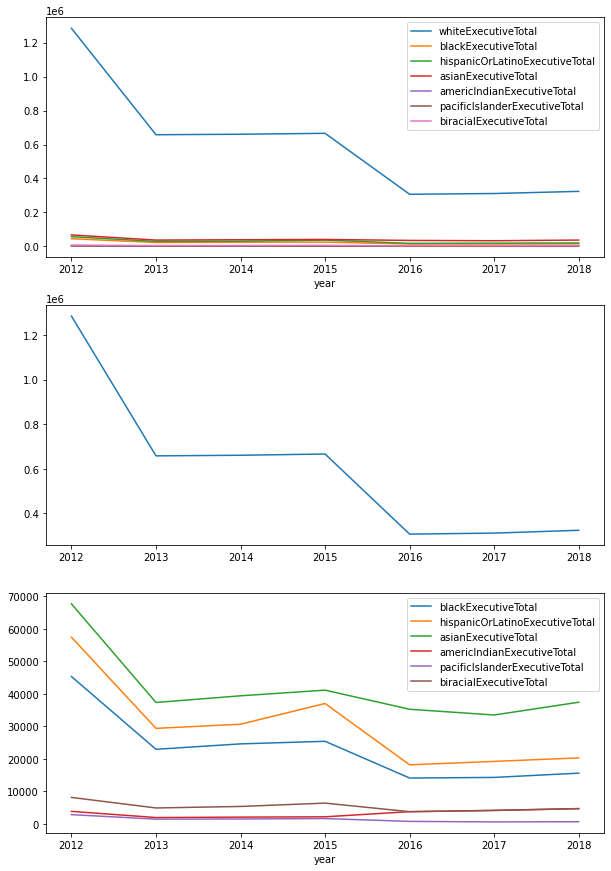

In [239]:
#create line graph for all races of executives with seaborn
exec_1 = exec_race_tot.iloc[:,1:]
exec_2 = exec_race_tot.iloc[:,2:]

plt.figure(3, figsize=(10,15))

plt.subplot(311)
sns.lineplot(data = exec_1, dashes = False)

plt.subplot(312)
sns.lineplot(data = exec_race_tot['whiteExecutiveTotal'])

plt.subplot(313)
sns.lineplot(data = exec_2, dashes = False)

The graphs above illustrate the total number of executives per year per race. As depicted by top graph, the number of white executives greatly outweigh any other race. From the bottom graph we can see that the black, asian, and hispanic/latino executives are greater than the pacific islander, native american, and biracial executives.

**Matplotlib**

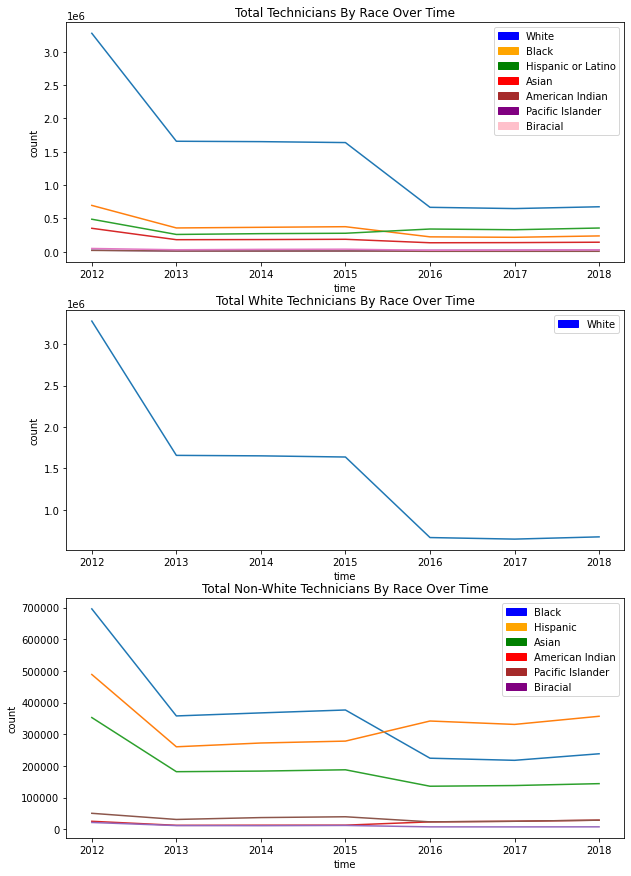

In [240]:
#create variable to represent the white, black, hispanic/latino, asian, american indian,
#pacific islander, and biracial technician total columns
tch = tech_race_tot.loc[:,'whiteTechnicianTotal']
tch1 = tech_race_tot.loc[:,'blackTechnicianTotal']
tch2 = tech_race_tot.loc[:,'hispanicOrLatinoTechnicianTotal']
tch3 = tech_race_tot.loc[:,'asianTechnicianTotal']
tch4 = tech_race_tot.loc[:,'americIndianTechnicianTotal']
tch5 = tech_race_tot.loc[:,'pacificIslanderTechnicianTotal']
tch6 = tech_race_tot.loc[:,'biracialTechnicianTotal']

#create line plots for the columns above
plt.figure(3, figsize=(10,15))

#plot all columns
plt.subplot(311)
plt.plot(tch)
plt.plot(tch1)
plt.plot(tch2)
plt.plot(tch3)
plt.plot(tch4)
plt.plot(tch5)
plt.plot(tch6)
plt.title('Total Technicians By Race Over Time')
plt.xlabel('time')
plt.ylabel('count')
#create legend
blue = mpatches.Patch(color='blue', label='White')
orange = mpatches.Patch(color='orange', label='Black')
green = mpatches.Patch(color='green', label='Hispanic or Latino')
red = mpatches.Patch(color='red', label='Asian')
brown = mpatches.Patch(color='brown', label='American Indian')
purple = mpatches.Patch(color='purple', label='Pacific Islander')
pink = mpatches.Patch(color='pink', label='Biracial')
plt.legend(handles=[blue, orange, green, red, brown, purple, pink])

#plot only the white technician values
plt.subplot(312)
plt.plot(tch)
plt.title('Total White Technicians By Race Over Time')
plt.xlabel('time')
plt.ylabel('count')
#create legend
blue = mpatches.Patch(color='blue', label='White')
plt.legend(handles=[blue])

#plot all columns that are not the white technician columns
plt.subplot(313)
plt.plot(tch1)
plt.plot(tch2)
plt.plot(tch3)
plt.plot(tch4)
plt.plot(tch5)
plt.plot(tch6)
plt.title('Total Non-White Technicians By Race Over Time')
plt.xlabel('time')
plt.ylabel('count')
#create legend
blue = mpatches.Patch(color='blue', label='Black')
orange = mpatches.Patch(color='orange', label='Hispanic')
green = mpatches.Patch(color='green', label='Asian')
red = mpatches.Patch(color='red', label='American Indian')
brown = mpatches.Patch(color='brown', label='Pacific Islander')
purple = mpatches.Patch(color='purple', label='Biracial')
plt.legend(handles=[blue, orange, green, red, brown, purple])

plt.show()

**Seaborn**

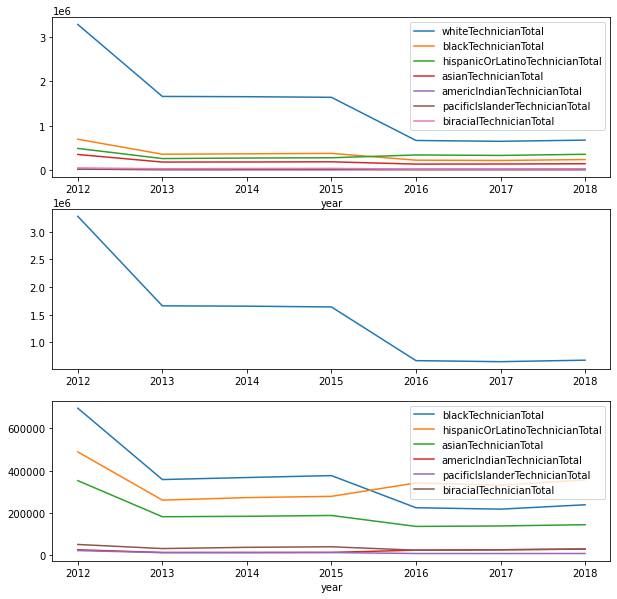

In [241]:
#create line plot of the total technicians for each race by time in seaborn
tech_1 = tech_race_tot.iloc[:,1:]
tech_2 = tech_race_tot.iloc[:,2:]

plt.figure(3, figsize=(10,10))

plt.subplot(311)
sns.lineplot(data = tech_1, dashes = False)

plt.subplot(312)
sns.lineplot(data = tech_race_tot['whiteTechnicianTotal'])

plt.subplot(313)
sns.lineplot(data = tech_2, dashes = False)

The graphs above illustrate the total number of technicians per race per year. With a similar trend to the executives, the top graph shows that the number of white executives dominate the number of executives belonging to the other races. Unlike the executive graph, it is easier to see some variation between the races. The same trend appears where the black, hispanic/latino, and asian technicians are greater than the pacific islander, native american, and biracial technicians.

### 3. What was the industry average representation by race of executives and technicians from 2012 to 2018?

**Matplotlib**

[]

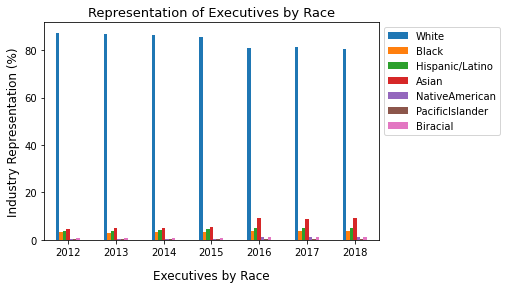

In [242]:
#create plot of executive representation
executive_representation.plot(kind="bar")

plt.xticks([0,1,2,3,4,5,6],rotation='horizontal')
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('Executives by Race', labelpad=12, fontsize=12)
plt.ylabel('Industry Representation (%)', fontsize=12)
plt.title('Representation of Executives by Race',fontsize=13)

plt.plot()

**Seaborn**

[]

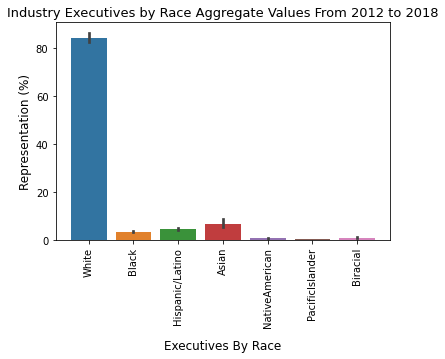

In [243]:
#create plot of executive representation
sns.barplot(data= executive_representation, orient='v')

plt.xticks([0,1,2,3,4,5,6],rotation='vertical')
plt.xlabel('Executives By Race', labelpad=12, fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.title('Industry Executives by Race Aggregate Values From 2012 to 2018',fontsize=13)

plt.plot()

The bar plots above show that from 2012 to 2018 executives part of the racial group "white" represented the majority of the executive's population in the industry with a mean of **84.13** and executives part of the racial group "pacific islander" represented the minority of the executive's population in the industry with a mean of **0.18**. Representation of executives part of the racial group "black" had a mean of 3.41, racial group "Hispanic/Latino" had a mean of 4.48, racial group "Asian" had a mean of 6.75, racial group "Native American" had a mean of 0.61 and racial group "biracial" had a mean of 0.84. 

**Matplorlib**

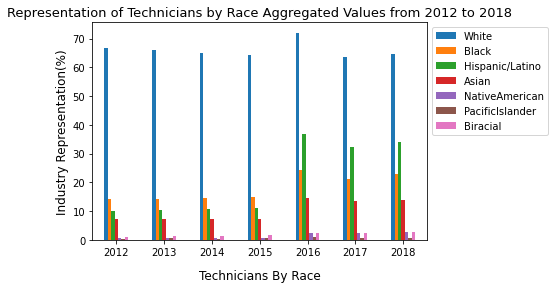

In [244]:
#create plot of technician representation
Technician_representation.plot(kind="bar")

plt.xticks([0,1,2,3,4,5,6],rotation='horizontal')
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('Technicians By Race', labelpad=12, fontsize=12)
plt.ylabel('Industry Representation(%)', fontsize=12)
plt.title('Representation of Technicians by Race Aggregated Values from 2012 to 2018',fontsize=13)

plt.show()

**Seaborn**

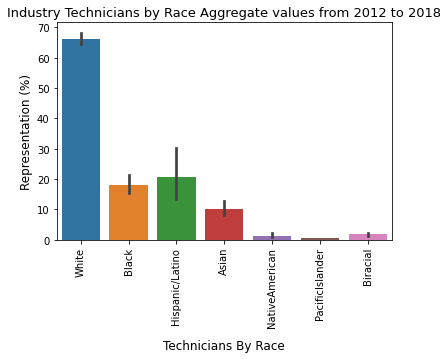

In [245]:
#create plot of technician representation
sns.barplot(data= Technician_representation, orient='v')

plt.xticks([0,1,2,3,4,5,6],rotation='vertical')

plt.xlabel('Technicians By Race', labelpad=12, fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.title('Industry Technicians by Race Aggregate values from 2012 to 2018',fontsize=13)

# Bar Graph Below
plt.show()

The bar plots above show that from 2012 to 2018 technicians part of the racial group "white" represented the majority of the technician's population in the industry with a mean of **66.05** and technicians part of the racial group "pacific islander" represented the minority of the technician's population in the industry with a mean of **0.60**. Representation of technicians part of the racial group "black" had a mean of 18.02, racial group "Hispanic/Latino" had a mean of 20.79, racial group "Asian" had a mean of 10.16, racial group "Native American" had a mean of 1.41 and racial group "biracial" had a mean of 1.87. 

### 4. What was the average industry representation by gender of executives and technicians from 2012 to 2018?

**Matplotlib**

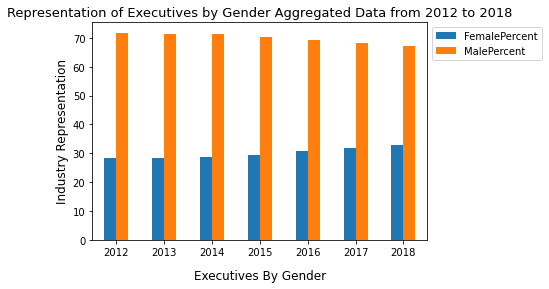

In [246]:
#create plot of executive gender representation
gender_representation.plot(y=["FemalePercent","MalePercent"], kind="bar")

plt.xticks([0,1,2,3,4,5,6],rotation='horizontal')
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('Executives By Gender', labelpad=12, fontsize=12)
plt.ylabel('Industry Representation', fontsize=12)
plt.title('Representation of Executives by Gender Aggregated Data from 2012 to 2018',fontsize=13)

# Graph Printed Below
plt.show()

**Seaborn**
#### Female Representation

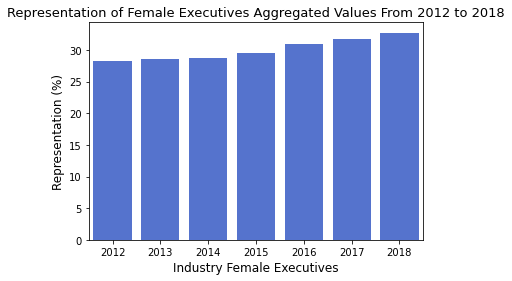

In [247]:
#create plot of executive female representation
sns.barplot(y="FemalePercent" , x= gender_representation.index, data = gender_representation, color='royalblue' )

plt.xlabel('Industry Female Executives', fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.title('Representation of Female Executives Aggregated Values From 2012 to 2018',fontsize=13)

# Graph Printed Below
plt.show()

#### Male Representation

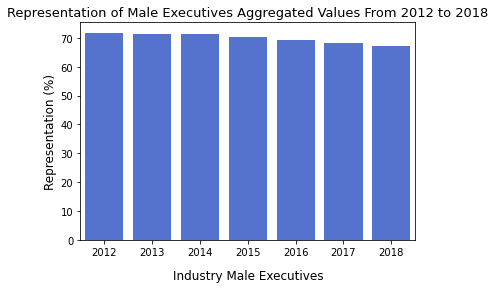

In [248]:
#create plot of executive male representation
sns.barplot(y="MalePercent" , x= gender_representation.index, data = gender_representation, color='royalblue')

plt.xlabel('Industry Male Executives', labelpad=12, fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.title('Representation of Male Executives Aggregated Values From 2012 to 2018',fontsize=13)

# Graph Printed Below
plt.show()

The bar plots above show that from 2012 to 2018 male executives represented the majority of the executive's population in the industry with a mean of **69.96** and female executives represented the minority of the executive's population in the industry with a mean of **30.04**. Male executive's representation recorded the highest industry participation rate of 71.79 in 2012 and recorded the lowest industry participation rate of 67.28 in 2018. Female executive's representation recorded the highest industry participation rate of 32.72 in 2018 and recorded the lowest industry participation rate of 28.21 in 2012.

#### Technicians<br>

To answer the question, I first created the dataframe containing the values for the analysis.<br>Dataframe`gender_tech`contains columns `year`,`MaleTechnicianTotal`, and `FemaleTechnicianTotal`.<br>


In [250]:
gender_tech= df[["year","MaleTechnicianTotal","FemaleTechnicianTotal"]]

# I added the values of the total male technicians with the total female technicians using the
# ".sum()" function to get the total value of the industry.
tech_ind_tot_col = gender_tech[('MaleTechnicianTotal')] + gender_tech[('FemaleTechnicianTotal')]
gender_tech['TechTotal'] = tech_ind_tot_col

# I groped by "year" and divided both, the female and male results 
# by the total industry value.
gender_tech_year = gender_tech.groupby('year').sum()
ftech_percent = gender_tech_year['FemaleTechnicianTotal'] *100 / gender_tech_year['TechTotal']
gender_tech_year['FemalePercent'] = ftech_percent
mtech_percent = gender_tech_year['MaleTechnicianTotal'] * 100 / gender_tech_year['TechTotal']
gender_tech_year['MalePercent'] = mtech_percent

# I created a dataframe containing the values
gender_representation_tech = pd.DataFrame(data=gender_tech_year)

# Dataframe Printed Below
gender_representation_tech.round(2)


<ipython-input-250-932b75088d25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_tech['TechTotal'] = tech_ind_tot_col


,MaleTechnicianTotal,FemaleTechnicianTotal,TechTotal,FemalePercent,MalePercent
year,,,,,
2012,2489630,2422906,4912536,49.32,50.68
2013,1275392,1238931,2514323,49.27,50.73
2014,1284976,1253033,2538009,49.37,50.63
2015,1275475,1271186,2546661,49.92,50.08
2016,1212149,651922,1864071,34.97,65.03
2017,1258385,643964,1902349,33.85,66.15
2018,1305412,691775,1997187,34.64,65.36


In [195]:
# Stats: mean, standard deviation, minimum, and quartiles for the
#total executives across all industries per year by racial group
gender_representation_tech.describe()

,MaleTechnicianTotal,FemaleTechnicianTotal,TechTotal,FemalePercent,MalePercent
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,1.443060e+06,1.167674e+06,2.610734e+06,43.049114,56.950886
std,4.623974e+05,6.278851e+05,1.060875e+06,8.018668,8.018668
min,1.212149e+06,6.439640e+05,1.864071e+06,33.850992,50.084208
25%,1.266888e+06,6.718485e+05,1.949768e+06,34.805246,50.654206
50%,1.275475e+06,1.238931e+06,2.514323e+06,49.274934,50.725066
75%,1.295194e+06,1.262110e+06,2.542335e+06,49.345794,65.194754
max,2.489630e+06,2.422906e+06,4.912536e+06,49.915792,66.149008


**Matplotlib**

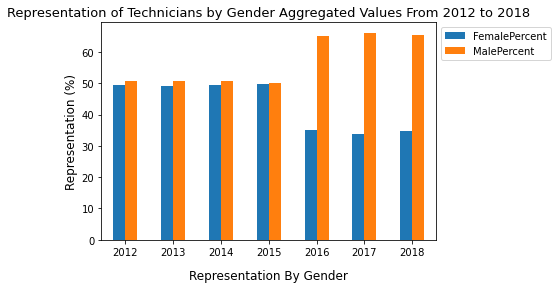

In [252]:
#create plot of male technicions
gender_representation_tech.plot(y=["FemalePercent","MalePercent"], kind="bar")
plt.xticks([0,1,2,3,4,5,6],rotation='horizontal')

plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Representation By Gender', labelpad=12, fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.title('Representation of Technicians by Gender Aggregated Values From 2012 to 2018',fontsize=13)

# Graph Printed Below
plt.show()

**Seaborn**
#### Female

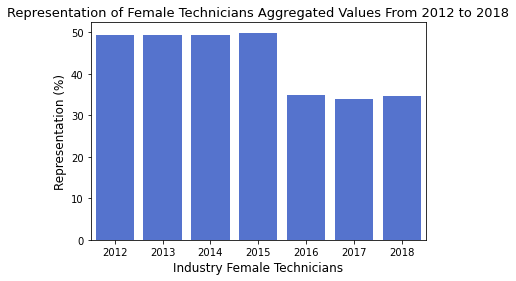

In [251]:
#create plot of female technicions
sns.barplot(y="FemalePercent" , x= gender_representation_tech.index, data = gender_representation_tech, color='royalblue')

plt.xlabel('Industry Female Technicians', fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.title('Representation of Female Technicians Aggregated Values From 2012 to 2018',fontsize=13)

# Graph Printed Below
plt.show()

#### Male

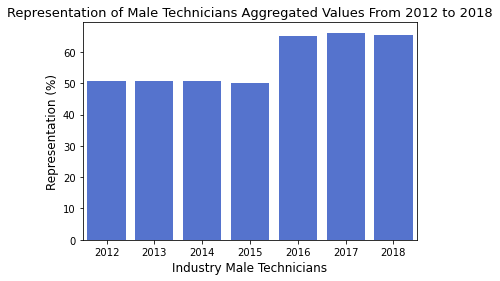

In [198]:
sns.barplot(y="MalePercent", x= gender_representation_tech.index, data = gender_representation_tech, color='royalblue')

plt.xlabel('Industry Male Technicians', fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.title('Representation of Male Technicians Aggregated Values From 2012 to 2018',fontsize=13)

# Graph Printed Below
plt.show()

The bar plots above show from that from 2012 to 2018 male technicians represented majority of the technician's population in the industry with a mean of **56.95** and female technicians represented the minority of the technician's population in the industry with a mean of **43.05**. Male technician's representation recorded the highest industry participation rate of 66.15 in 2017 and recorded the lowest industry participation rate of 50.08 in 2015. Female technician's representation recorded the highest industry participation rate of 49.92 in 2015 and recorded the lowest industry participation rate of 33.85 in 2017.

## Conclusion


#### 1. How does the participation of a particular industry change with time with respect to gender from 2012 to 2018?

Answering this question is best done by looking at the graph under question 1 in the 'Inference' section. According to this plot, there is a total decrease of executives during the time period from 2012 to 2018. For this duration, the number of male executives was continuously greater than the number of female executives. There are no points in the graphs where they are equal or where the female executives dominate the male executives. Additionally, there are significant decreases in the number of total, male, and female executives between 2012 and 2013 and from 2015 to 2016. Overall, the gender diversity in the industry of executives is still an area of improvement.


#### 2. How does the participation of executives and technicians change with time with respect to race from 2012 to 2018?

The first graphs under question 2 of the 'Inference' section show the total number of executives by race over time. As depicted by these graphs, the number of white executives is significantly larger than other races. All races have a decrease in the number of technicians between the years 2012 and 2018. Among these races, the white technicians had the most significant drop in technicians. Despite this, they still dominated in count over the number of executives in other races. The graph depicting the non-white technicians, shows that the black, asian, and hispanic/latino executives are greater than the pacific islander, native american, and biracial executives.

The second graph under question 2 of the 'Inference' section show the total number of technicians by race over time. These graphs show a similar trend to the executives in that there is a total decrease in the number of technicians over time. Despite this, the number of white technicians continues to dominate the number of technicians in any other race. Looking at the graph of non-white technicians and comparing this to the graph of non-white executives, there is a little more variation in the number of technicians between these races.  The same trends appear where the number of black, hispanic/latino, and asian technicians are greater than the pacific islander, native american, and biracial technicians. Every race has a decrease in the number of technicions from 2012 to 2018 except the hispanic/latino population. This is the only race to see a slight increase in the number of technicians.

Overall, there is some work to be done with the diversity in the industry of technicians. It is important to note that the stark difference between these population values can be caused by the nonuniform distribution of races within the United States population as a whole, and can also be caused by a lack of diversity. Research questions 3 and 4 seek to explore this distinction further.

#### 3. What was the industry average representation by race of executives and technicians from 2012 to 2018?<br>

The results of the analysis show that the average highest to lowest industry participation rate of executives by racial group from 2012 to 2018 was: "white"(84.13%), "Asian"(6.75%), "Hispanic/Latino"(4.48%), "black"(3.41%), "biracial"(0.84%), "Native American"(0.61%), and "Pacific Islander"(0.18%).  

The results of the analysis show that the average highest to lowest industry participation rate of technicians by racial group was: "white"(66.05%), "Hispanic/Latino"(20.79%), "black"(18.02%), "Asian"(10.16%), "Native American"(1.41%), "biracial"(1.87%), and "Pacific Islander"(0.60%).

Executives and technicians from the racial group "white" had the highest industry participation rate and "Pacific Islanders" had the lowest industry participation rate in both sectors. 

From the 2016 US Census Bureau, the disribution of race and origin is as follows: white - 60.1%, black - 13.4%, hispanic/latino - 18.5%, asian - 5.9%, american indian - 1.3%, pacific islander - 0.2%, and biracial - 2.3%. This can be used to gain further insight on the population values of executives and technicians. With respect to the racial distribution of the US, there is an over representaion of the white population in both the executive and technician industries. There is an underrepresentation among executives and an overrepresentation among technicians, for the black, hispanic/latino and pacific islander populations. There is an underrespresentation in both the executive and technician industries for the biracial population. And finally, there is an overrepresentation of the asian population in both the executive and technician industries. 

Overall, there is some work to be done on blanacing the racial represenations found within executives and technicians.

#### 4. What was the average industry representation by gender of executives and technicians from 2012 to 2018?<br>

Results from the analysis show that males had the highest industry participation rate in both, the executives and the technician's sectors from 2012 to 2018. Males accounted for an average of 69.96% of all executives in the industry while females acounted for an average of 30.04% of executives in the industry. Males accounted for an average of 56.95% of all technicians in the industry, while females accounted for an average of 43.05 of technicians in the industry.

The analysis show that the difference in representation of males and females is greater in the executive sector than in the technician sector. Considering that the ideal representation of males to females in this industry is 50% to 50%, there is some work to be done with respect to diversity and inclusion.

## References

https://www.census.gov/quickfacts/fact/table/US/PST045219

https://www.kaggle.com/nicholasmarangi/job-patterns-for-minorities-and-women-usa?select=CountByLocationAndGeneralIndustry%28CBSA-NAC2%29.csv